<Figure size 1440x1280 with 0 Axes>

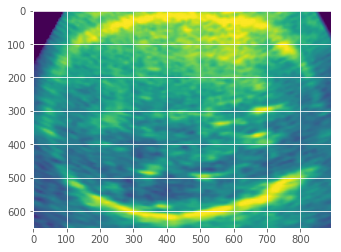

In [1]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

chips = cv2.imread('rev.png')
chips_gray = cv2.cvtColor(chips, cv2.COLOR_BGR2GRAY)
plt.imshow(chips_gray)


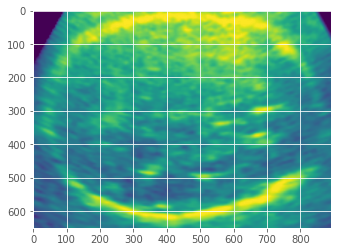

In [2]:
chips_preprocessed = cv2.GaussianBlur(chips_gray, (5, 5), 0)
plt.imshow(chips_preprocessed)

(-0.5, 891.5, 650.5, -0.5)

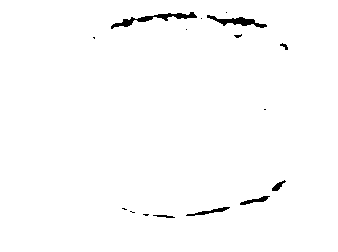

In [57]:
_, chips_binary = cv2.threshold(chips_preprocessed, 250, 255, cv2.THRESH_BINARY)
# chips_binary = cv2.bitwise_not(chips_binary)
plt.imshow(chips_binary, cmap='Greys')
plt.axis('off')

In [69]:
[a,b] = np.nonzero(chips_binary)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(a)

[  5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   6
   6   6   6   6   6   6   6   6   6   6   6   6   6   6   6   6   6   6
   6   6   6   6   7   7   7   7   7   7   7   7   7   7   7   7   7   8
   8   8   8   8   8   8   8   8   8   8   8   9   9   9   9   9   9   9
   9   9   9   9   9   9  10  10  10  10  10  10  10  10  10  10  10  10
  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10
  10  10  10  10  10  10  10  10  10  10  11  11  11  11  11  11  11  11
  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11
  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11
  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11
  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  12  12
  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12
  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12
  12  12  12  12  12  12  12  12  12  12  12  12  1

In [70]:
print(b)

[472 473 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 470
 471 472 473 474 475 476 477 577 578 579 580 581 582 583 584 585 586 587
 588 589 590 591 470 471 472 473 474 475 476 477 478 479 480 579 580 470
 471 472 473 474 475 476 477 478 479 480 481 470 471 472 473 474 475 476
 477 478 479 480 481 482 403 404 405 406 407 408 409 410 411 412 413 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 470 471 472
 473 474 475 476 477 478 479 480 481 482 377 378 379 380 381 382 383 400
 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 375 376
 377 378 379 380 381 382 383 384 385 386 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 42

(-0.5, 891.5, 650.5, -0.5)

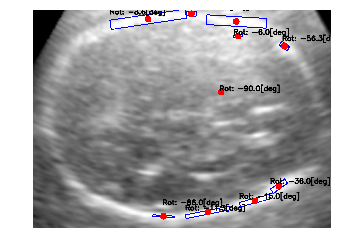

In [54]:
chips_contours, _ = cv2.findContours(chips_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
chips_and_contours = np.copy(chips)
min_chip_area = 60
large_contours = [cnt for cnt in chips_contours if cv2.contourArea(cnt) > min_chip_area]

bounding_img = np.copy(chips)
for contour in large_contours:
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cgx = int(rect[0][0])
    cgy = int(rect[0][1])
    leftx = int(cgx - (rect[1][0]/2.0))
    lefty = int(cgy - (rect[1][1]/2.0))
    angle = round(rect[2],1)
    cv2.drawContours(bounding_img,[box],0,(0,0,255),2)
    cv2.circle(bounding_img,(cgx,cgy), 10, (255,0,0), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(bounding_img,'Rot: '+str(angle)+'[deg]',(leftx,lefty), font, 0.7, (0,0,0),2,cv2.LINE_AA)

plt.imshow(bounding_img)
plt.axis("off")

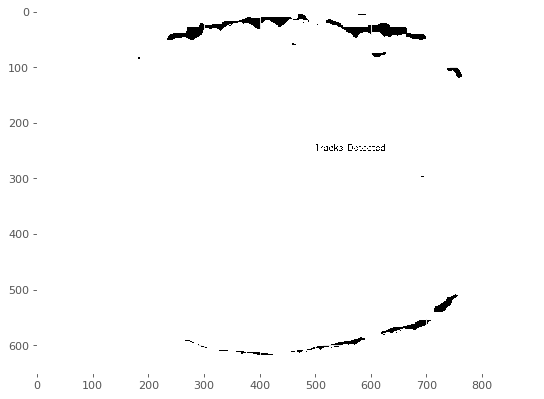

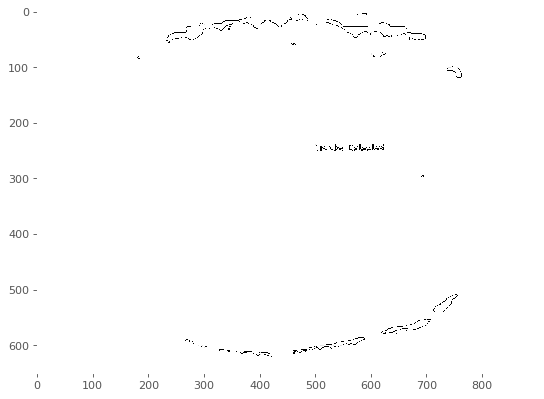

In [48]:
edges = cv2.Canny(chips_binary,150,200,apertureSize = 3)
minLineLength = 30
maxLineGap = 5
lines = cv2.HoughLinesP(edges,cv2.HOUGH_PROBABILISTIC, np.pi/180, 30, minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        cv2.polylines(chips_binary, [pts], True, (0,255,0))

font = cv2.FONT_HERSHEY_SIMPLEX
# plt.putText(chips_binary,"Tracks Detected", (500, 250), font, 0.5, 255)
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(chips_binary,cmap='Greys')
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(edges,cmap='Greys')
# plt.show()

In [52]:
contours, _ = cv2.findContours(chips_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# biggest area
target = max(contours, key=lambda x: cv2.contourArea(x))
cv2.drawContours(img, [target], -1, [0, 0, 255], -1) # debug
# just example of fitting
x = target[:, :, 0].flatten()
y = target[:, :, 1].flatten()
poly = np.poly1d(np.polyfit(x, y, 5))
for _x in range(min(x), max(x), 5): # too lazy for line/curve :)
    cv2.circle(img, (_x, int(poly(_x))), 3, [0, 255, 0])

cv2.imshow('result', img)
cv2.waitKey(0)

TypeError: 'int' object is not callable